## Driven Damped Pendulum

In [3]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

gamma = 1.077
w = 2*np.pi
w0 = 1.5*w
beta = w0/4
def f(u, t, g):
    return (u[1], -2*beta*u[1]-w0**2*np.sin(u[0])+g*w0**2*np.cos(w*t))

phi0 = [0, 0]
ts = np.linspace(0, 30, 1000)
us = odeint(f, phi0, ts, (gamma,))
usd = odeint(f, [-np.pi/2-0.001, 0], ts, (gamma,))
phis = us[:,0]
phisd = usd[:,0]

plt.figure(figsize = (15,6), dpi = 80)

plt.plot(ts, phis, "-", linewidth = 2, label = "Φ(0)=0")
# plt.plot(ts, phisd, "-", linewidth = 2, label = "Φ(0)=-π/2")
plt.legend(loc='upper left')

plt.xlabel("t")
plt.ylabel("Φ(t)")
plt.title("γ: " + str(gamma))
plt.grid(True, which = "both")
plt.tight_layout()
plt.show()


plt.close('all')

ModuleNotFoundError: No module named 'matplotlib'

## Bifurcation Plot

In [ ]:
gamma_arr = np.arange(1.03, 1.53, 0.0001)
time_arr = np.arange(0, 601, 1)
pts = [[0 for x in range(100)] for y in range(len(gamma_arr))]
x_arr = []
y_arr = []
for g in gamma_arr:
    for i in range(101):
        x_arr.append(g)
    sol = odeint(f, phi0, time_arr, (g,))[500:][:,0]
    y_arr.extend(sol)

## Bifurcation Plot Show

In [ ]:
plt.figure(figsize = (15,9), dpi = 80)
plt.plot(x_arr, y_arr, ".", linewidth = 1.0)
plt.xlabel("γ")
plt.ylabel("Φ(t)")
plt.title("t = 500, 501, ..., 600")
plt.grid(True, which = "both")
plt.tight_layout()
plt.show()

plt.close('all')

## State Space

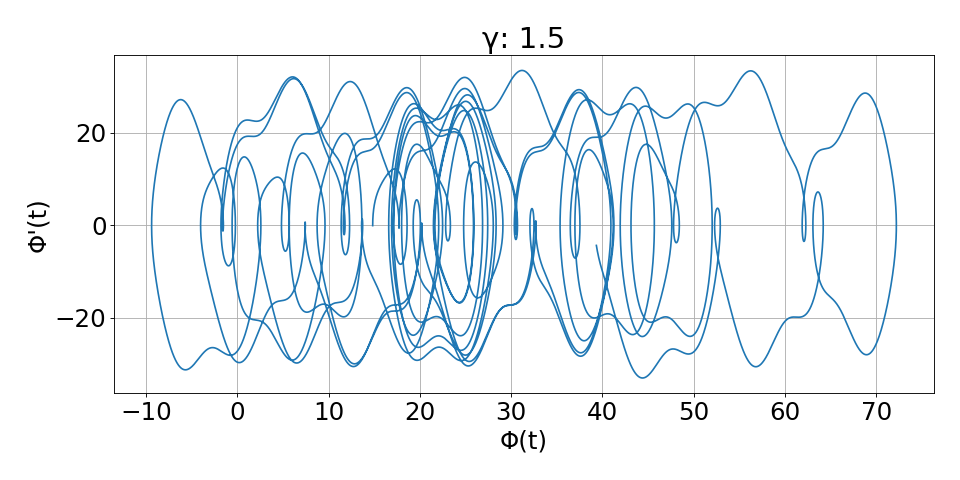

In [142]:
left = 20
right = 60
step = 1000
ts = np.linspace(0,right,right*step)

gamma = 1.5
phi_arr = odeint(f, [-np.pi/2,0], ts, (gamma,))

plt.figure(figsize = (12,6), dpi = 80)

interval = slice(left*step, right*step)
plt.plot(phi_arr[interval,0], phi_arr[interval,1], "-")
plt.xlabel("Φ(t)")
plt.ylabel("Φ'(t)")
plt.title("γ: " + str(gamma))
plt.grid(True, which = "both")
plt.tight_layout()
plt.show()

plt.close('all')

## Poincare Section

In [ ]:
left = 10
right = 60000
step = 1000
ts = np.linspace(0,right,right*step)

gamma = 1.5
beta = w0/4
poincare = odeint(f, [-np.pi/2,0], ts, (gamma,))

plt.figure(figsize = (12,6), dpi = 80)

plt.plot(poincare[left*step::step,0], poincare[left*step::step,1].flatten(), ".")
plt.xlabel("Φ(t)")
plt.ylabel("Φ'(t)")
plt.title("γ: " + str(gamma))
plt.grid(True, which = "both")
plt.tight_layout()
plt.xlim([-np.pi, np.pi])
plt.ylim([-10, 30])
plt.show()

plt.close('all')

<class 'numpy.core._exceptions._ArrayMemoryError'>: Unable to allocate 458. MiB for an array with shape (60000000,) and data type float64